In [1]:
import numpy as np
import pandas as pd
import random
import math

from arms.bernoulli import BernoulliArm
%matplotlib inline

In [2]:
class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def select_arm(self):
        if random.random() > self.epsilon:
            return np.argmax(self.values)
        else:
            return random.randrange(len(self.values))
  
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [3]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm = np.argmax(means)
print("Best arm is " + str(best_arm))

Best arm is 2


In [4]:
from testing_framework.tests import *

dfs = []
for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 250)
    df = pd.DataFrame(np.array(results).T)
    df['epsilon'] = epsilon
    dfs.append(df)
    
dataframe = pd.concat(dfs,ignore_index=True)
dataframe.columns = ["Sim", "T", "ChosenArm", "Reward", "CumulativeReward", "Epsilon"]

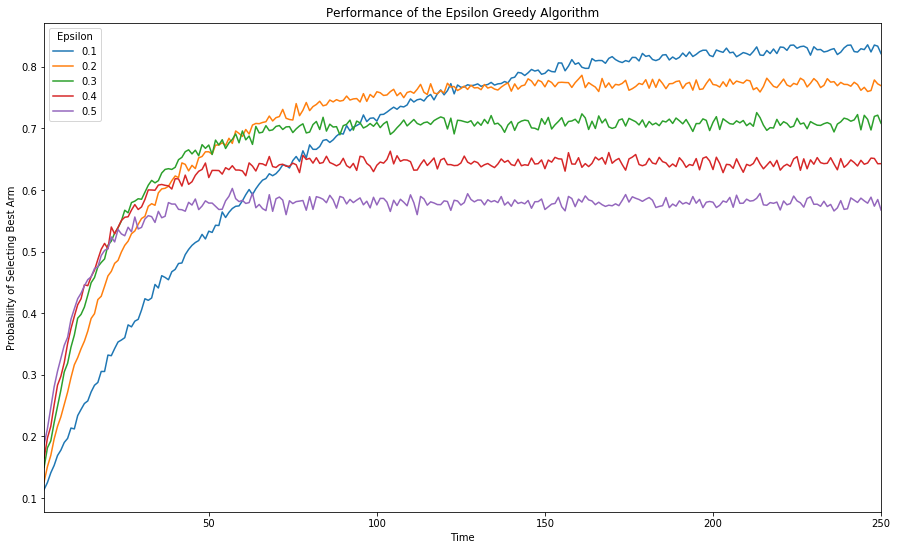

In [5]:
ax = dataframe.groupby(["T","Epsilon"]).mean().reset_index().pivot('T','Epsilon','Reward').plot(figsize=(15,9))
ax.set_title("Performance of the Epsilon Greedy Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

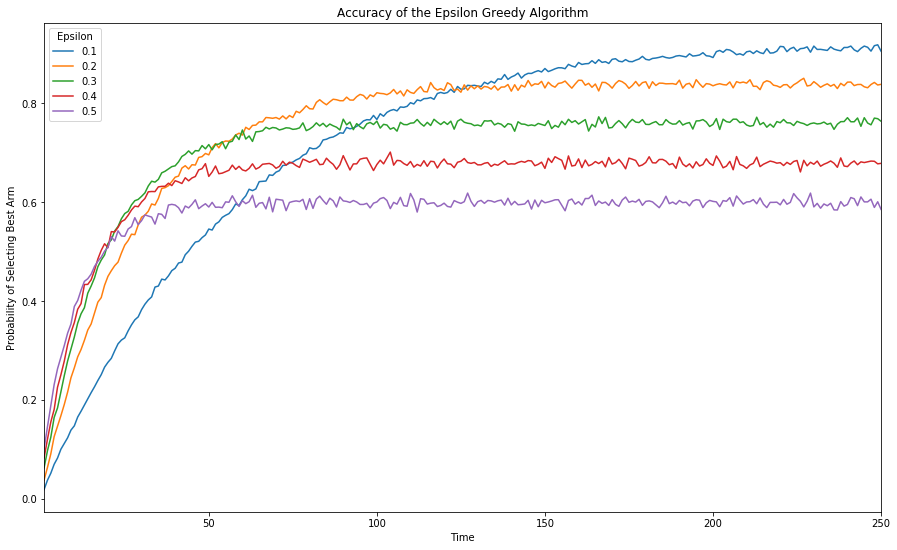

In [6]:
df_grouped = dataframe.groupby(["T","Epsilon","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped  = df_grouped .reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].pivot('T','Epsilon','Reward').plot(figsize=(15,9))
ax.set_title("Accuracy of the Epsilon Greedy Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

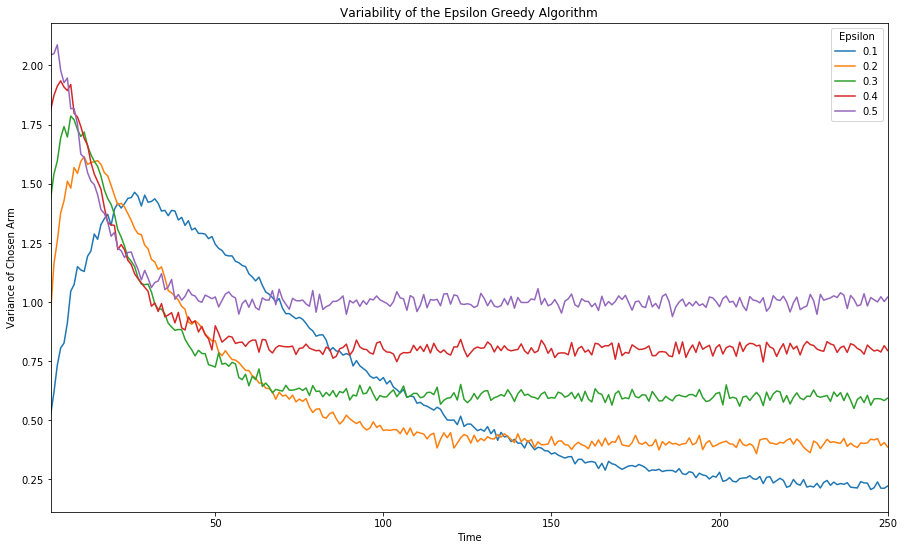

In [7]:
ax = dataframe.groupby(["T","Epsilon"]).var().reset_index().pivot('T','Epsilon','ChosenArm').plot(figsize=(15,9))
ax.set_title("Variability of the Epsilon Greedy Algorithm")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

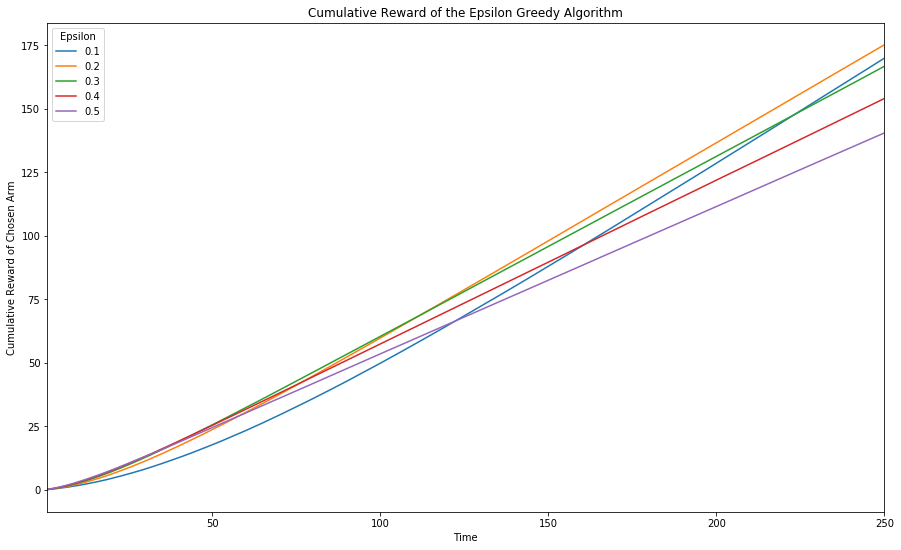

In [8]:
ax = dataframe.groupby(["T","Epsilon"]).mean().reset_index().pivot('T','Epsilon','CumulativeReward').plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the Epsilon Greedy Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [9]:
dataframe.to_csv("Epsilon-greedy_results.csv",index=None)

#### Epsilon-Greedy with annealing

In [10]:
class AnnealingEpsilonGreedy():
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]

    def select_arm(self):
        t = sum(self.counts) + 1
        epsilon = 1 / math.log(t + 0.0000001)

        if random.random() > epsilon:
            return np.argmax(self.values)
        else:
            return random.randrange(len(self.values))
  
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value

In [11]:
algo = AnnealingEpsilonGreedy([], [])
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 5000, 250)
dataframe = pd.DataFrame(np.array(results).T,columns=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

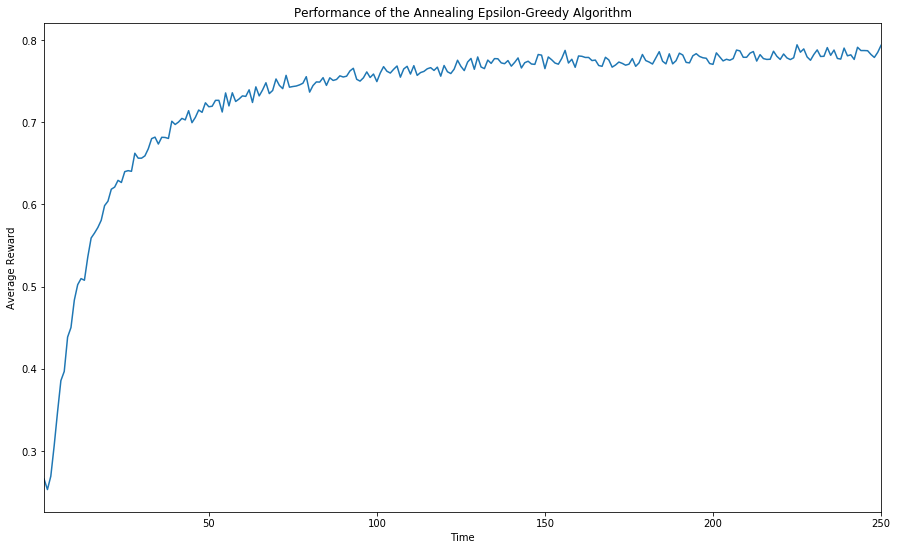

In [12]:
ax = dataframe.groupby("T").mean()['Reward'].plot(figsize=(15,9))
ax.set_title("Performance of the Annealing Epsilon-Greedy Algorithm")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

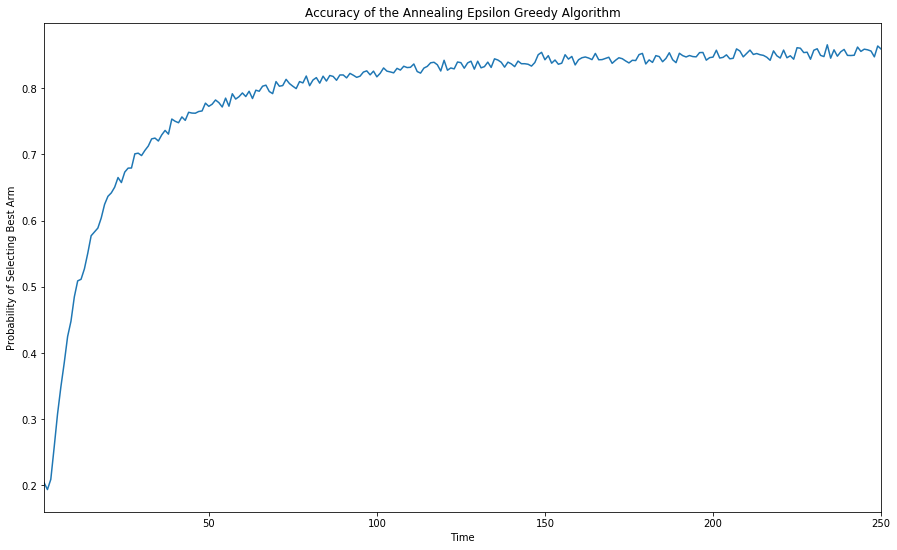

In [13]:
df_grouped = dataframe.groupby(["T","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped = df_grouped.reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].set_index('T')['Reward'].plot(figsize=(15,9))
ax.set_title("Accuracy of the Annealing Epsilon Greedy Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

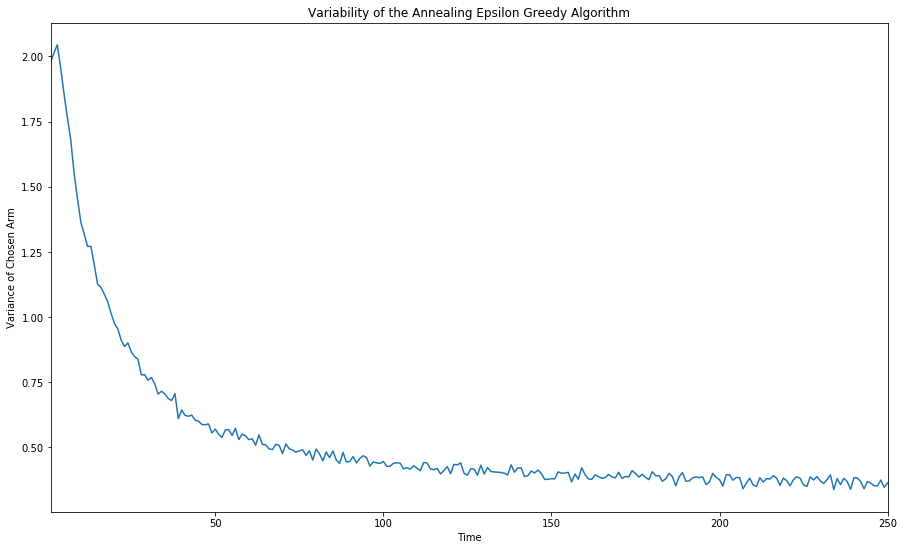

In [14]:
ax = dataframe.groupby("T").var()['ChosenArm'].plot(figsize=(15,9))
ax.set_title("Variability of the Annealing Epsilon Greedy Algorithm")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

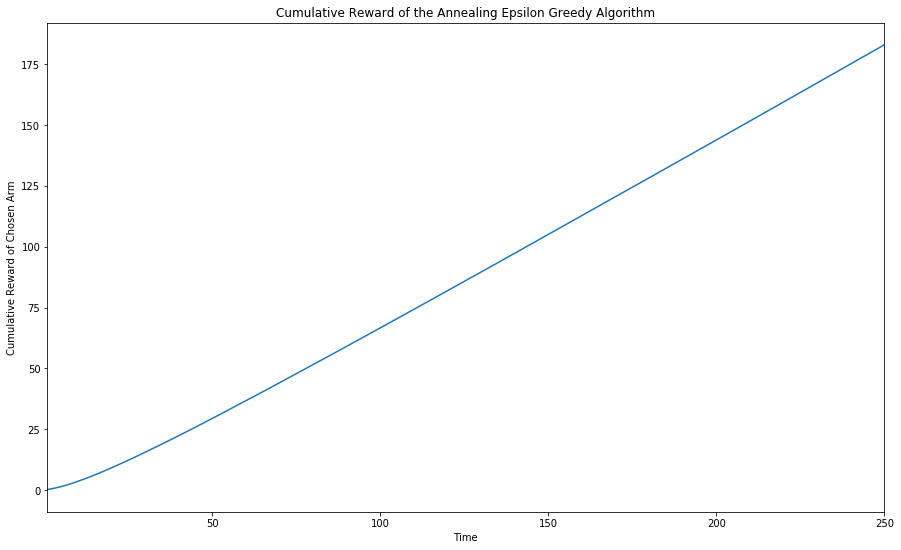

In [15]:
ax = dataframe.groupby("T").mean()['CumulativeReward'].plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the Annealing Epsilon Greedy Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [ ]:
dataframe.to_csv("Epsilon-greedy-Annealing_results.csv",index=None)